# Задание 5. GAN

Написать GAN для MNIST

## Установим окружение

In [1]:
! pip install -r requirements.txt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
LR = 1e-3
DR = 1e-4
EPOCHS_NUM = 100
RANDOM_SEED = 228

## Data
Скачаем датасет MNIST

In [4]:
! sh download_data.sh

mkdir: cannot create directory ‘data’: File exists
--2022-05-23 10:24:51--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M   447KB/s    in 22s     

2022-05-23 10:25:13 (448 KB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-05-23 10:25:13--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Reusing existing connection to yann.lecun.com:80.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K   179KB/s    in 0.2s    

2022-05-23 10:25:14 (179 KB/s) - ‘tr

In [5]:
from dataset import load_mnist, random_split_train_val
x_train,y_train, x_test, y_test = load_mnist("data")
x_train, y_train = random_split_train_val(x_train, y_train, random_seed=RANDOM_SEED)

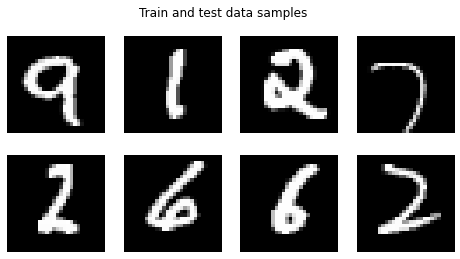

In [6]:
from visualization import data_visualization
data_visualization(x_train, x_train, RANDOM_SEED)

In [7]:
print('Train size:', x_train.shape[0])
print('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


## Modelling

Epoch:0/100 lr:0.001000 g_loss:0.7930 d_loss:1.1923


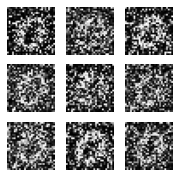

Epoch:5/100 lr:0.000999 g_loss:0.7827 d_loss:1.2095


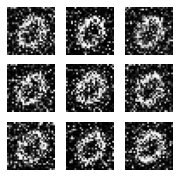

Epoch:10/100 lr:0.000996 g_loss:0.7327 d_loss:1.3162


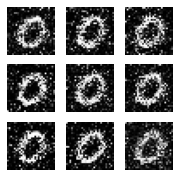

Epoch:15/100 lr:0.000990 g_loss:0.7012 d_loss:1.3761


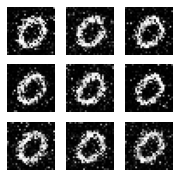

Epoch:20/100 lr:0.000981 g_loss:0.6864 d_loss:1.4057


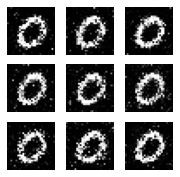

Epoch:25/100 lr:0.000970 g_loss:0.6776 d_loss:1.4250


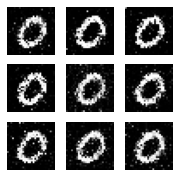

Epoch:30/100 lr:0.000957 g_loss:0.6701 d_loss:1.4382


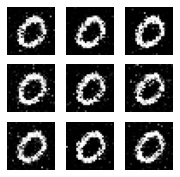

Epoch:35/100 lr:0.000942 g_loss:0.6657 d_loss:1.4476


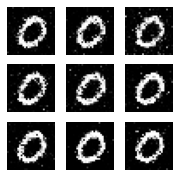

Epoch:40/100 lr:0.000925 g_loss:0.6650 d_loss:1.4517


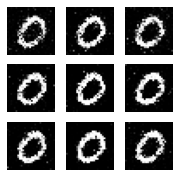

Epoch:45/100 lr:0.000906 g_loss:0.6642 d_loss:1.4545


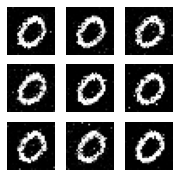

Epoch:50/100 lr:0.000885 g_loss:0.6648 d_loss:1.4544


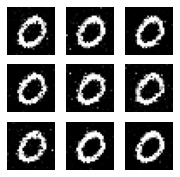

Epoch:55/100 lr:0.000862 g_loss:0.6652 d_loss:1.4513


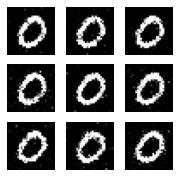

Epoch:60/100 lr:0.000838 g_loss:0.6685 d_loss:1.4441


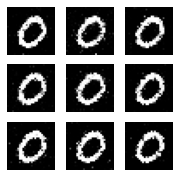

Epoch:65/100 lr:0.000813 g_loss:0.6732 d_loss:1.4329


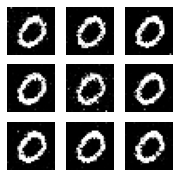

Epoch:70/100 lr:0.000786 g_loss:0.6791 d_loss:1.4190


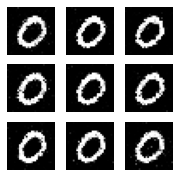

Epoch:75/100 lr:0.000758 g_loss:0.6849 d_loss:1.4046


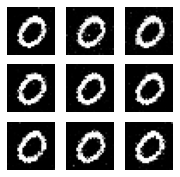

Epoch:80/100 lr:0.000730 g_loss:0.6930 d_loss:1.3876


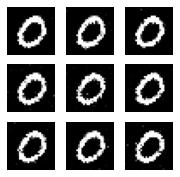

Epoch:85/100 lr:0.000700 g_loss:0.6998 d_loss:1.3714


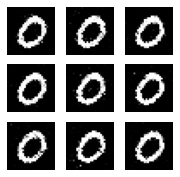

Epoch:90/100 lr:0.000671 g_loss:0.7085 d_loss:1.3541


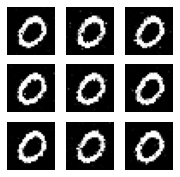

Epoch:95/100 lr:0.000641 g_loss:0.7166 d_loss:1.3379


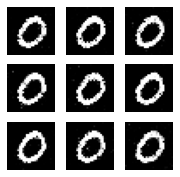

Epoch:0/100 lr:0.001000 g_loss:0.7450 d_loss:1.2812


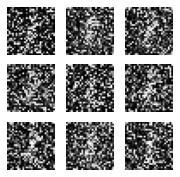

Epoch:5/100 lr:0.000999 g_loss:0.8046 d_loss:1.1754


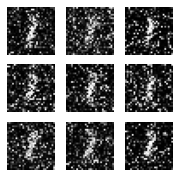

Epoch:10/100 lr:0.000996 g_loss:0.7400 d_loss:1.2964


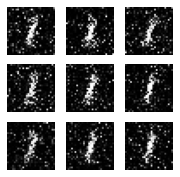

Epoch:15/100 lr:0.000990 g_loss:0.7163 d_loss:1.3487


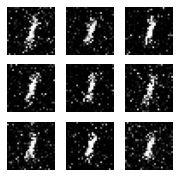

Epoch:20/100 lr:0.000981 g_loss:0.6992 d_loss:1.3781


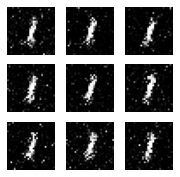

Epoch:25/100 lr:0.000970 g_loss:0.6924 d_loss:1.3935


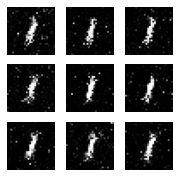

Epoch:30/100 lr:0.000957 g_loss:0.6903 d_loss:1.3977


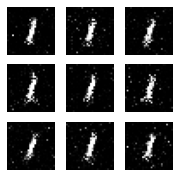

Epoch:35/100 lr:0.000942 g_loss:0.6914 d_loss:1.3972


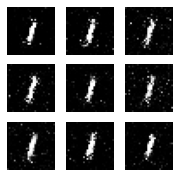

Epoch:40/100 lr:0.000925 g_loss:0.6926 d_loss:1.3945


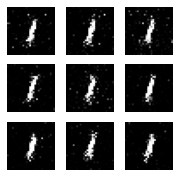

Epoch:45/100 lr:0.000906 g_loss:0.6962 d_loss:1.3887


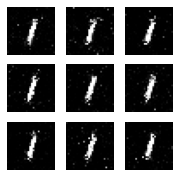

Epoch:50/100 lr:0.000885 g_loss:0.6978 d_loss:1.3831


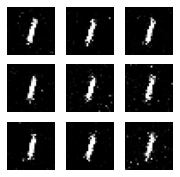

Epoch:55/100 lr:0.000862 g_loss:0.7039 d_loss:1.3732


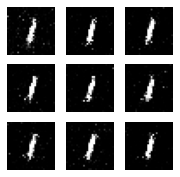

Epoch:60/100 lr:0.000838 g_loss:0.7065 d_loss:1.3651


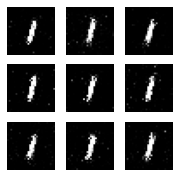

Epoch:65/100 lr:0.000813 g_loss:0.7120 d_loss:1.3550


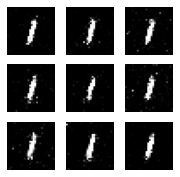

Epoch:70/100 lr:0.000786 g_loss:0.7141 d_loss:1.3496


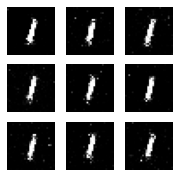

Epoch:75/100 lr:0.000758 g_loss:0.7164 d_loss:1.3429


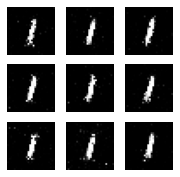

Epoch:80/100 lr:0.000730 g_loss:0.7178 d_loss:1.3396


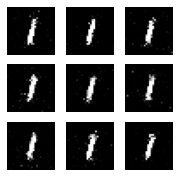

Epoch:85/100 lr:0.000700 g_loss:0.7181 d_loss:1.3399


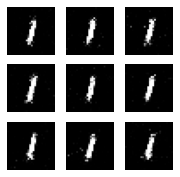

Epoch:90/100 lr:0.000671 g_loss:0.7177 d_loss:1.3407


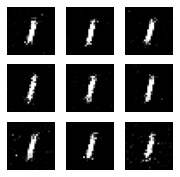

Epoch:95/100 lr:0.000641 g_loss:0.7156 d_loss:1.3437


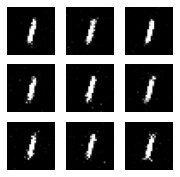

Epoch:0/100 lr:0.001000 g_loss:0.7728 d_loss:1.2200


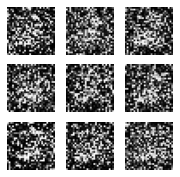

Epoch:5/100 lr:0.000999 g_loss:0.7809 d_loss:1.2083


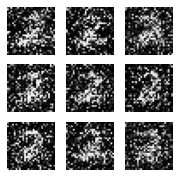

Epoch:10/100 lr:0.000996 g_loss:0.7232 d_loss:1.3178


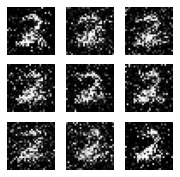

Epoch:15/100 lr:0.000990 g_loss:0.7016 d_loss:1.3679


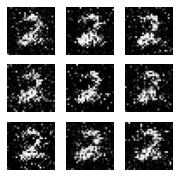

Epoch:20/100 lr:0.000981 g_loss:0.6875 d_loss:1.3984


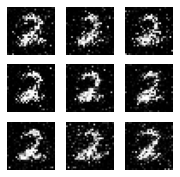

Epoch:25/100 lr:0.000970 g_loss:0.6779 d_loss:1.4168


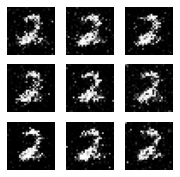

Epoch:30/100 lr:0.000957 g_loss:0.6742 d_loss:1.4275


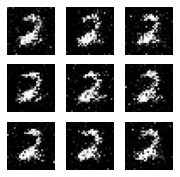

Epoch:35/100 lr:0.000942 g_loss:0.6698 d_loss:1.4364


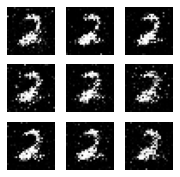

Epoch:40/100 lr:0.000925 g_loss:0.6663 d_loss:1.4423


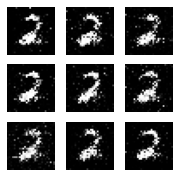

Epoch:45/100 lr:0.000906 g_loss:0.6653 d_loss:1.4456


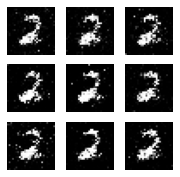

Epoch:50/100 lr:0.000885 g_loss:0.6646 d_loss:1.4480


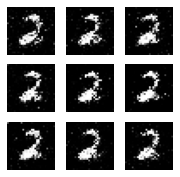

Epoch:55/100 lr:0.000862 g_loss:0.6627 d_loss:1.4517


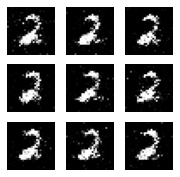

Epoch:60/100 lr:0.000838 g_loss:0.6611 d_loss:1.4532


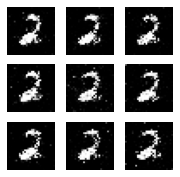

Epoch:65/100 lr:0.000813 g_loss:0.6601 d_loss:1.4540


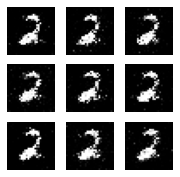

Epoch:70/100 lr:0.000786 g_loss:0.6622 d_loss:1.4510


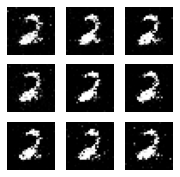

Epoch:75/100 lr:0.000758 g_loss:0.6637 d_loss:1.4479


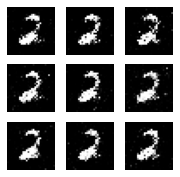

Epoch:80/100 lr:0.000730 g_loss:0.6634 d_loss:1.4464


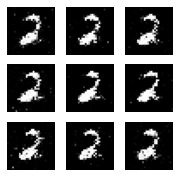

Epoch:85/100 lr:0.000700 g_loss:0.6653 d_loss:1.4418


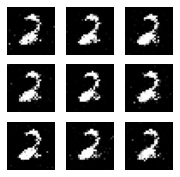

Epoch:90/100 lr:0.000671 g_loss:0.6681 d_loss:1.4353


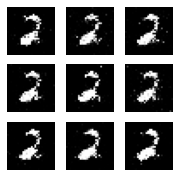

Epoch:95/100 lr:0.000641 g_loss:0.6712 d_loss:1.4284


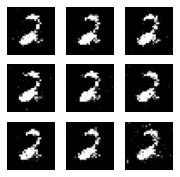

Epoch:0/100 lr:0.001000 g_loss:0.7749 d_loss:1.2102


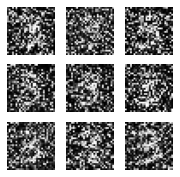

Epoch:5/100 lr:0.000999 g_loss:0.7761 d_loss:1.2160


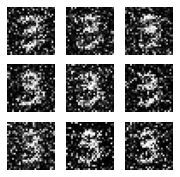

Epoch:10/100 lr:0.000996 g_loss:0.7260 d_loss:1.3289


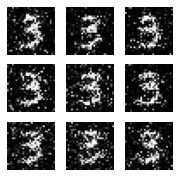

Epoch:15/100 lr:0.000990 g_loss:0.7034 d_loss:1.3825


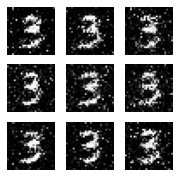

Epoch:20/100 lr:0.000981 g_loss:0.6820 d_loss:1.4201


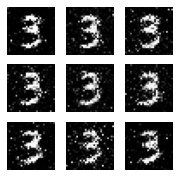

Epoch:25/100 lr:0.000970 g_loss:0.6757 d_loss:1.4359


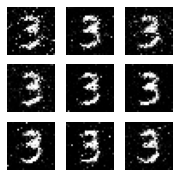

Epoch:30/100 lr:0.000957 g_loss:0.6728 d_loss:1.4453


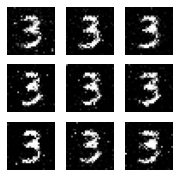

Epoch:35/100 lr:0.000942 g_loss:0.6688 d_loss:1.4528


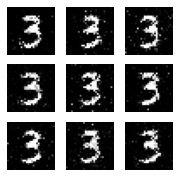

Epoch:40/100 lr:0.000925 g_loss:0.6660 d_loss:1.4585


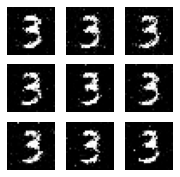

Epoch:45/100 lr:0.000906 g_loss:0.6657 d_loss:1.4597


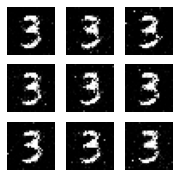

Epoch:50/100 lr:0.000885 g_loss:0.6643 d_loss:1.4626


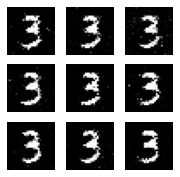

Epoch:55/100 lr:0.000862 g_loss:0.6661 d_loss:1.4603


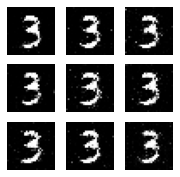

Epoch:60/100 lr:0.000838 g_loss:0.6657 d_loss:1.4599


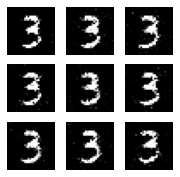

Epoch:65/100 lr:0.000813 g_loss:0.6662 d_loss:1.4582


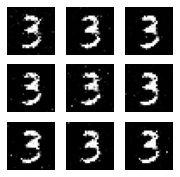

Epoch:70/100 lr:0.000786 g_loss:0.6670 d_loss:1.4561


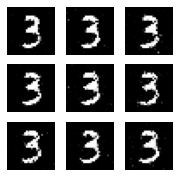

Epoch:75/100 lr:0.000758 g_loss:0.6691 d_loss:1.4520


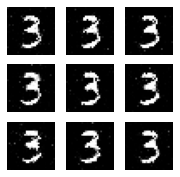

Epoch:80/100 lr:0.000730 g_loss:0.6703 d_loss:1.4487


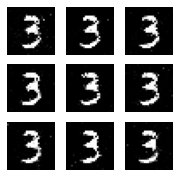

Epoch:85/100 lr:0.000700 g_loss:0.6728 d_loss:1.4439


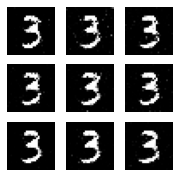

Epoch:90/100 lr:0.000671 g_loss:0.6756 d_loss:1.4381


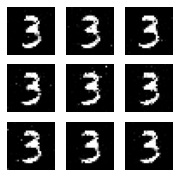

Epoch:95/100 lr:0.000641 g_loss:0.6778 d_loss:1.4332


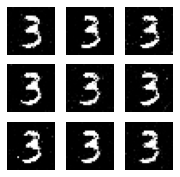

Epoch:0/100 lr:0.001000 g_loss:0.8936 d_loss:1.2825


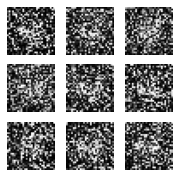

Epoch:5/100 lr:0.000999 g_loss:0.7981 d_loss:1.1796


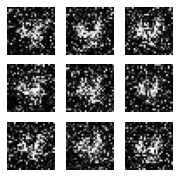

Epoch:10/100 lr:0.000996 g_loss:0.7265 d_loss:1.3120


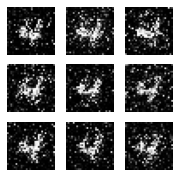

Epoch:15/100 lr:0.000990 g_loss:0.7000 d_loss:1.3710


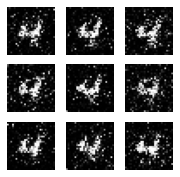

Epoch:20/100 lr:0.000981 g_loss:0.6872 d_loss:1.4005


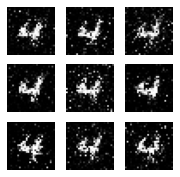

Epoch:25/100 lr:0.000970 g_loss:0.6767 d_loss:1.4219


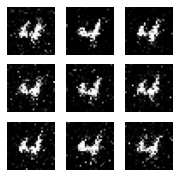

Epoch:30/100 lr:0.000957 g_loss:0.6714 d_loss:1.4336


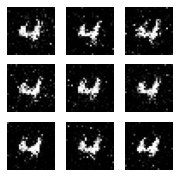

Epoch:35/100 lr:0.000942 g_loss:0.6676 d_loss:1.4425


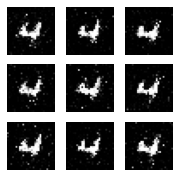

Epoch:40/100 lr:0.000925 g_loss:0.6621 d_loss:1.4506


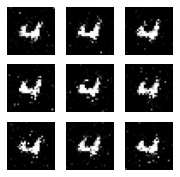

Epoch:45/100 lr:0.000906 g_loss:0.6645 d_loss:1.4496


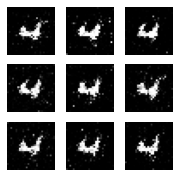

Epoch:50/100 lr:0.000885 g_loss:0.6615 d_loss:1.4523


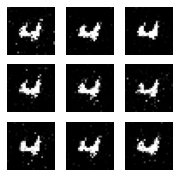

Epoch:55/100 lr:0.000862 g_loss:0.6636 d_loss:1.4501


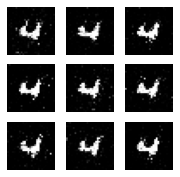

Epoch:60/100 lr:0.000838 g_loss:0.6658 d_loss:1.4458


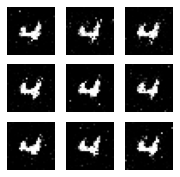

Epoch:65/100 lr:0.000813 g_loss:0.6675 d_loss:1.4407


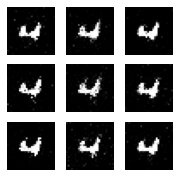

Epoch:70/100 lr:0.000786 g_loss:0.6715 d_loss:1.4334


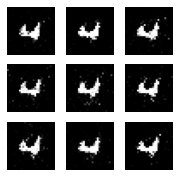

Epoch:75/100 lr:0.000758 g_loss:0.6746 d_loss:1.4257


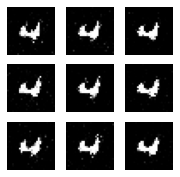

Epoch:80/100 lr:0.000730 g_loss:0.6792 d_loss:1.4163


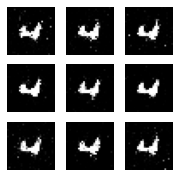

Epoch:85/100 lr:0.000700 g_loss:0.6844 d_loss:1.4066


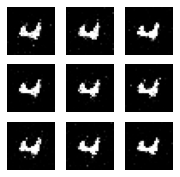

Epoch:90/100 lr:0.000671 g_loss:0.6898 d_loss:1.3959


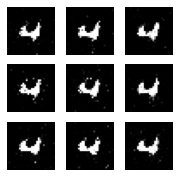

Epoch:95/100 lr:0.000641 g_loss:0.6949 d_loss:1.3855


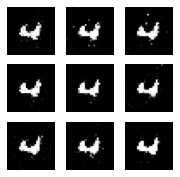

Epoch:0/100 lr:0.001000 g_loss:0.8252 d_loss:1.1412


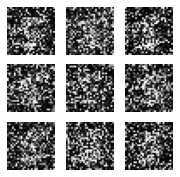

Epoch:5/100 lr:0.000999 g_loss:0.7880 d_loss:1.1942


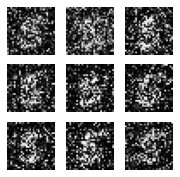

Epoch:10/100 lr:0.000996 g_loss:0.7329 d_loss:1.3071


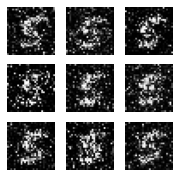

Epoch:15/100 lr:0.000990 g_loss:0.7010 d_loss:1.3730


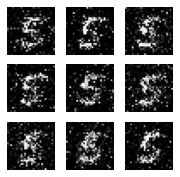

Epoch:20/100 lr:0.000981 g_loss:0.6930 d_loss:1.3986


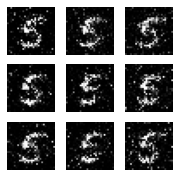

Epoch:25/100 lr:0.000970 g_loss:0.6784 d_loss:1.4247


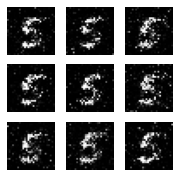

Epoch:30/100 lr:0.000957 g_loss:0.6734 d_loss:1.4368


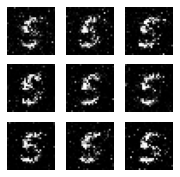

Epoch:35/100 lr:0.000942 g_loss:0.6663 d_loss:1.4489


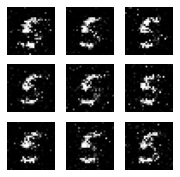

Epoch:40/100 lr:0.000925 g_loss:0.6648 d_loss:1.4538


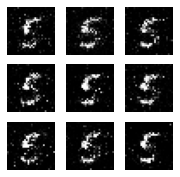

Epoch:45/100 lr:0.000906 g_loss:0.6626 d_loss:1.4585


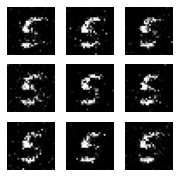

Epoch:50/100 lr:0.000885 g_loss:0.6606 d_loss:1.4633


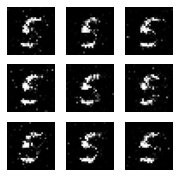

Epoch:55/100 lr:0.000862 g_loss:0.6604 d_loss:1.4653


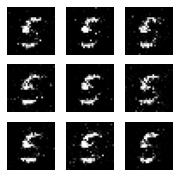

Epoch:60/100 lr:0.000838 g_loss:0.6601 d_loss:1.4665


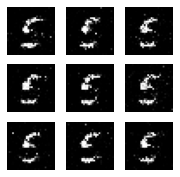

Epoch:65/100 lr:0.000813 g_loss:0.6587 d_loss:1.4692


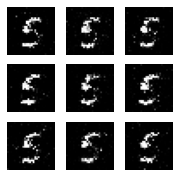

Epoch:70/100 lr:0.000786 g_loss:0.6588 d_loss:1.4682


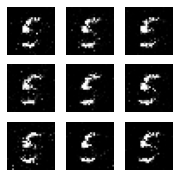

Epoch:75/100 lr:0.000758 g_loss:0.6594 d_loss:1.4678


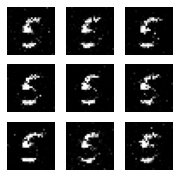

Epoch:80/100 lr:0.000730 g_loss:0.6590 d_loss:1.4677


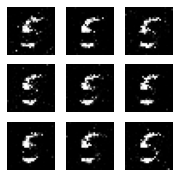

Epoch:85/100 lr:0.000700 g_loss:0.6603 d_loss:1.4658


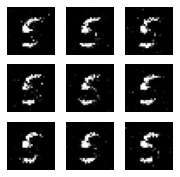

Epoch:90/100 lr:0.000671 g_loss:0.6605 d_loss:1.4648


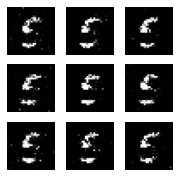

Epoch:95/100 lr:0.000641 g_loss:0.6616 d_loss:1.4627


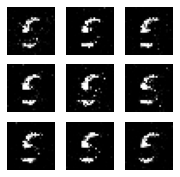

Epoch:0/100 lr:0.001000 g_loss:0.7903 d_loss:1.2105


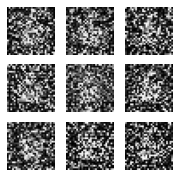

Epoch:5/100 lr:0.000999 g_loss:0.7896 d_loss:1.1930


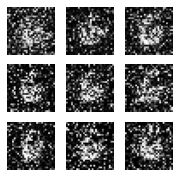

Epoch:10/100 lr:0.000996 g_loss:0.7326 d_loss:1.3070


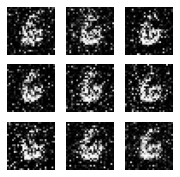

Epoch:15/100 lr:0.000990 g_loss:0.7058 d_loss:1.3630


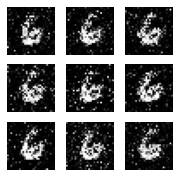

Epoch:20/100 lr:0.000981 g_loss:0.6921 d_loss:1.3939


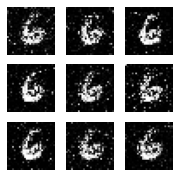

Epoch:25/100 lr:0.000970 g_loss:0.6817 d_loss:1.4133


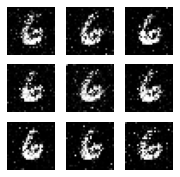

Epoch:30/100 lr:0.000957 g_loss:0.6785 d_loss:1.4222


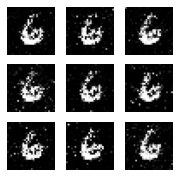

Epoch:35/100 lr:0.000942 g_loss:0.6736 d_loss:1.4304


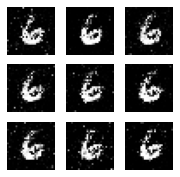

Epoch:40/100 lr:0.000925 g_loss:0.6725 d_loss:1.4320


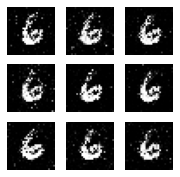

Epoch:45/100 lr:0.000906 g_loss:0.6700 d_loss:1.4330


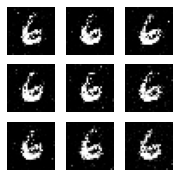

Epoch:50/100 lr:0.000885 g_loss:0.6755 d_loss:1.4253


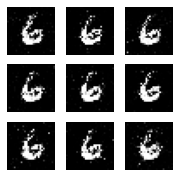

Epoch:55/100 lr:0.000862 g_loss:0.6775 d_loss:1.4207


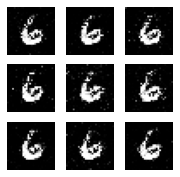

Epoch:60/100 lr:0.000838 g_loss:0.6806 d_loss:1.4141


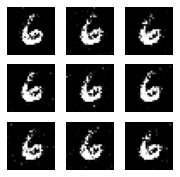

Epoch:65/100 lr:0.000813 g_loss:0.6846 d_loss:1.4060


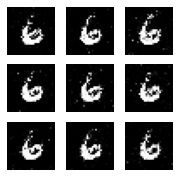

Epoch:70/100 lr:0.000786 g_loss:0.6882 d_loss:1.3988


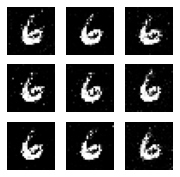

Epoch:75/100 lr:0.000758 g_loss:0.6920 d_loss:1.3909


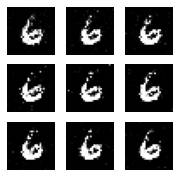

Epoch:80/100 lr:0.000730 g_loss:0.6978 d_loss:1.3808


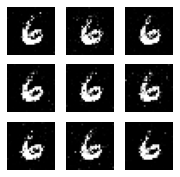

Epoch:85/100 lr:0.000700 g_loss:0.7014 d_loss:1.3725


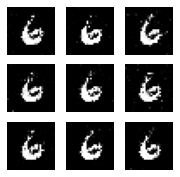

Epoch:90/100 lr:0.000671 g_loss:0.7058 d_loss:1.3635


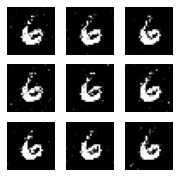

Epoch:95/100 lr:0.000641 g_loss:0.7104 d_loss:1.3546


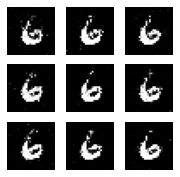

Epoch:0/100 lr:0.001000 g_loss:0.8275 d_loss:1.2389


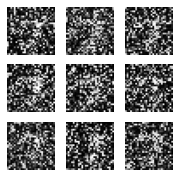

Epoch:5/100 lr:0.000999 g_loss:0.7912 d_loss:1.1881


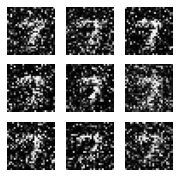

Epoch:10/100 lr:0.000996 g_loss:0.7279 d_loss:1.3180


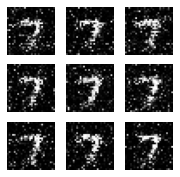

Epoch:15/100 lr:0.000990 g_loss:0.6977 d_loss:1.3784


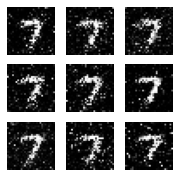

Epoch:20/100 lr:0.000981 g_loss:0.6859 d_loss:1.4025


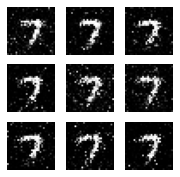

Epoch:25/100 lr:0.000970 g_loss:0.6841 d_loss:1.4092


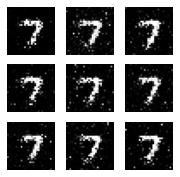

Epoch:30/100 lr:0.000957 g_loss:0.6817 d_loss:1.4102


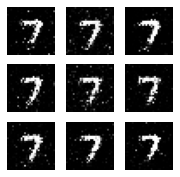

Epoch:35/100 lr:0.000942 g_loss:0.6871 d_loss:1.3998


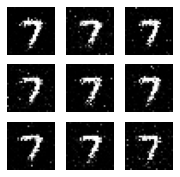

Epoch:40/100 lr:0.000925 g_loss:0.6939 d_loss:1.3866


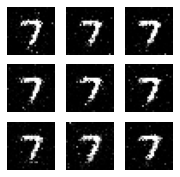

Epoch:45/100 lr:0.000906 g_loss:0.7024 d_loss:1.3703


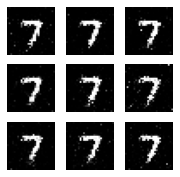

Epoch:50/100 lr:0.000885 g_loss:0.7102 d_loss:1.3560


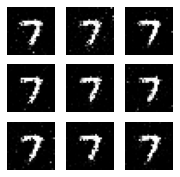

Epoch:55/100 lr:0.000862 g_loss:0.7203 d_loss:1.3377


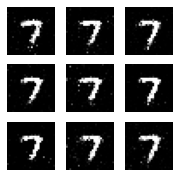

Epoch:60/100 lr:0.000838 g_loss:0.7283 d_loss:1.3215


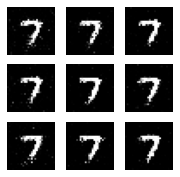

Epoch:65/100 lr:0.000813 g_loss:0.7376 d_loss:1.3057


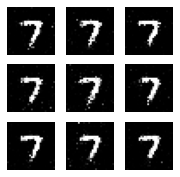

Epoch:70/100 lr:0.000786 g_loss:0.7459 d_loss:1.2910


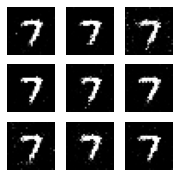

Epoch:75/100 lr:0.000758 g_loss:0.7539 d_loss:1.2784


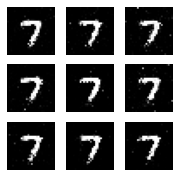

Epoch:80/100 lr:0.000730 g_loss:0.7594 d_loss:1.2674


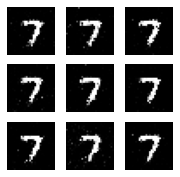

Epoch:85/100 lr:0.000700 g_loss:0.7650 d_loss:1.2588


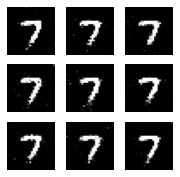

Epoch:90/100 lr:0.000671 g_loss:0.7674 d_loss:1.2547


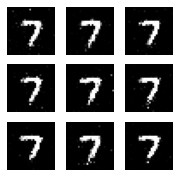

Epoch:95/100 lr:0.000641 g_loss:0.7711 d_loss:1.2490


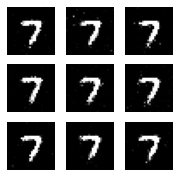

Epoch:0/100 lr:0.001000 g_loss:0.7792 d_loss:1.2247


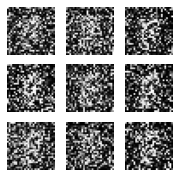

Epoch:5/100 lr:0.000999 g_loss:0.7937 d_loss:1.1917


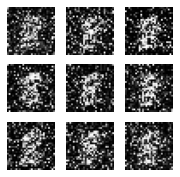

Epoch:10/100 lr:0.000996 g_loss:0.7325 d_loss:1.3034


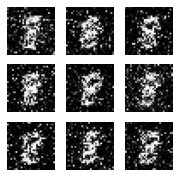

Epoch:15/100 lr:0.000990 g_loss:0.7046 d_loss:1.3612


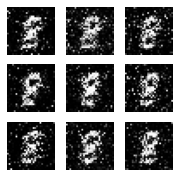

Epoch:20/100 lr:0.000981 g_loss:0.6865 d_loss:1.3952


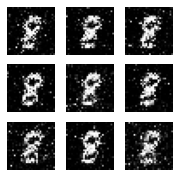

Epoch:25/100 lr:0.000970 g_loss:0.6815 d_loss:1.4088


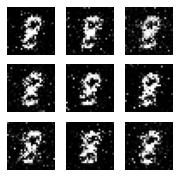

Epoch:30/100 lr:0.000957 g_loss:0.6754 d_loss:1.4206


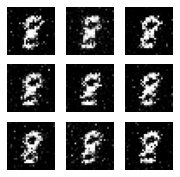

Epoch:35/100 lr:0.000942 g_loss:0.6726 d_loss:1.4269


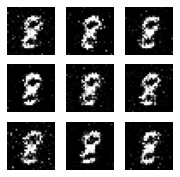

Epoch:40/100 lr:0.000925 g_loss:0.6710 d_loss:1.4303


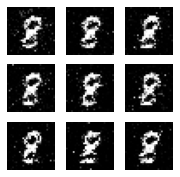

Epoch:45/100 lr:0.000906 g_loss:0.6693 d_loss:1.4321


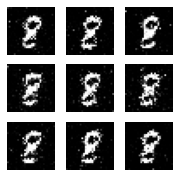

Epoch:50/100 lr:0.000885 g_loss:0.6708 d_loss:1.4295


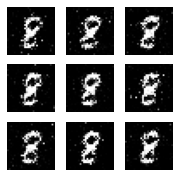

Epoch:55/100 lr:0.000862 g_loss:0.6727 d_loss:1.4259


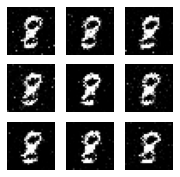

Epoch:60/100 lr:0.000838 g_loss:0.6746 d_loss:1.4201


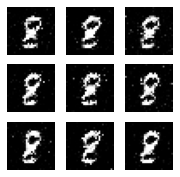

Epoch:65/100 lr:0.000813 g_loss:0.6801 d_loss:1.4104


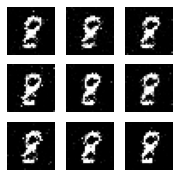

Epoch:70/100 lr:0.000786 g_loss:0.6845 d_loss:1.4003


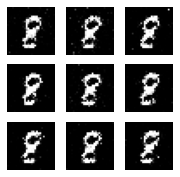

Epoch:75/100 lr:0.000758 g_loss:0.6891 d_loss:1.3904


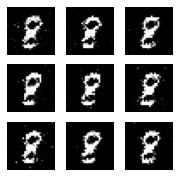

Epoch:80/100 lr:0.000730 g_loss:0.6962 d_loss:1.3771


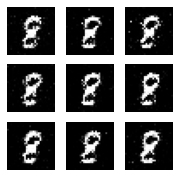

Epoch:85/100 lr:0.000700 g_loss:0.7035 d_loss:1.3632


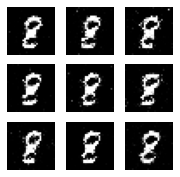

Epoch:90/100 lr:0.000671 g_loss:0.7106 d_loss:1.3483


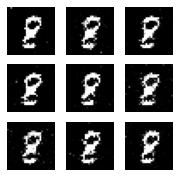

Epoch:95/100 lr:0.000641 g_loss:0.7190 d_loss:1.3324


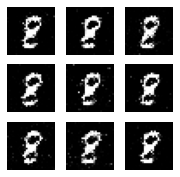

Epoch:0/100 lr:0.001000 g_loss:0.7501 d_loss:1.2704


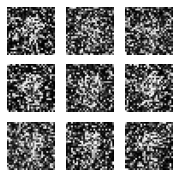

Epoch:5/100 lr:0.000999 g_loss:0.7961 d_loss:1.1821


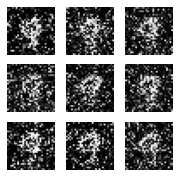

Epoch:10/100 lr:0.000996 g_loss:0.7361 d_loss:1.3019


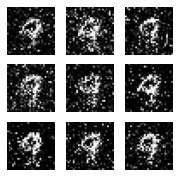

Epoch:15/100 lr:0.000990 g_loss:0.7019 d_loss:1.3653


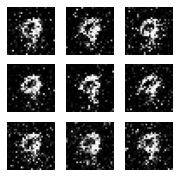

Epoch:20/100 lr:0.000981 g_loss:0.6842 d_loss:1.3981


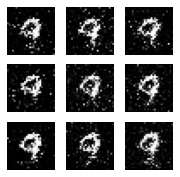

Epoch:25/100 lr:0.000970 g_loss:0.6765 d_loss:1.4155


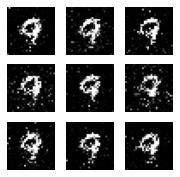

Epoch:30/100 lr:0.000957 g_loss:0.6737 d_loss:1.4235


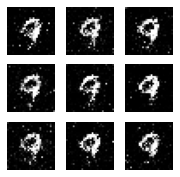

Epoch:35/100 lr:0.000942 g_loss:0.6731 d_loss:1.4270


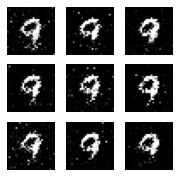

Epoch:40/100 lr:0.000925 g_loss:0.6738 d_loss:1.4241


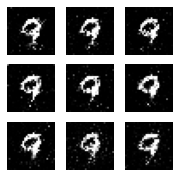

Epoch:45/100 lr:0.000906 g_loss:0.6773 d_loss:1.4175


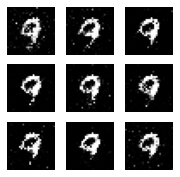

Epoch:50/100 lr:0.000885 g_loss:0.6841 d_loss:1.4039


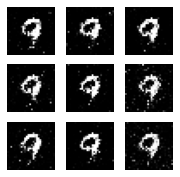

Epoch:55/100 lr:0.000862 g_loss:0.6902 d_loss:1.3899


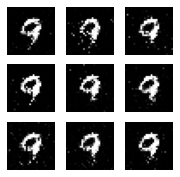

Epoch:60/100 lr:0.000838 g_loss:0.6997 d_loss:1.3704


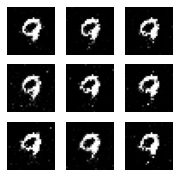

Epoch:65/100 lr:0.000813 g_loss:0.7129 d_loss:1.3473


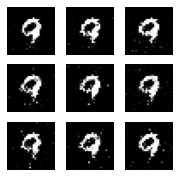

Epoch:70/100 lr:0.000786 g_loss:0.7239 d_loss:1.3256


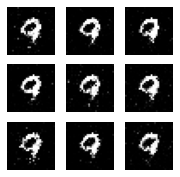

Epoch:75/100 lr:0.000758 g_loss:0.7360 d_loss:1.3031


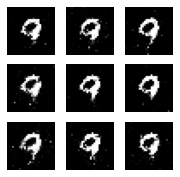

Epoch:80/100 lr:0.000730 g_loss:0.7487 d_loss:1.2797


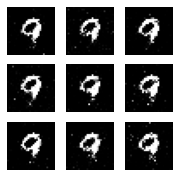

Epoch:85/100 lr:0.000700 g_loss:0.7626 d_loss:1.2556


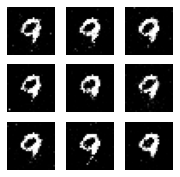

Epoch:90/100 lr:0.000671 g_loss:0.7744 d_loss:1.2354


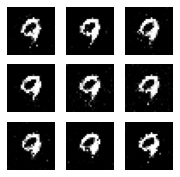

Epoch:95/100 lr:0.000641 g_loss:0.7844 d_loss:1.2179


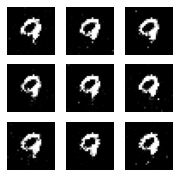

In [8]:
from model import GAN
for i in range(10):
    model = GAN([i], epochs=EPOCHS_NUM, learning_rate=LR, decay_rate=DR)
    J_Ds, J_Gs = model.train(x_train, y_train)